In [38]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [85]:
%run src/foveation_utils.py

In [16]:
keehar_plaintext_rgb  = cv2.imread("input/text/images/keehar-plaintext.png", cv2.IMREAD_COLOR)
keehar_plaintext_grayscale = cv2.cvtColor(keehar_plaintext_rgb, cv2.COLOR_BGR2GRAY)
keehar_plaintext_lab = cv2.cvtColor(keehar_plaintext_rgb, cv2.COLOR_BGR2LAB)
keehar_plaintext_rgb_channels = cv2.split(keehar_plaintext_rgb)
keehar_plaintext_lab_channels = cv2.split(keehar_plaintext_lab)

rgb_colours = ('b', 'g', 'r')

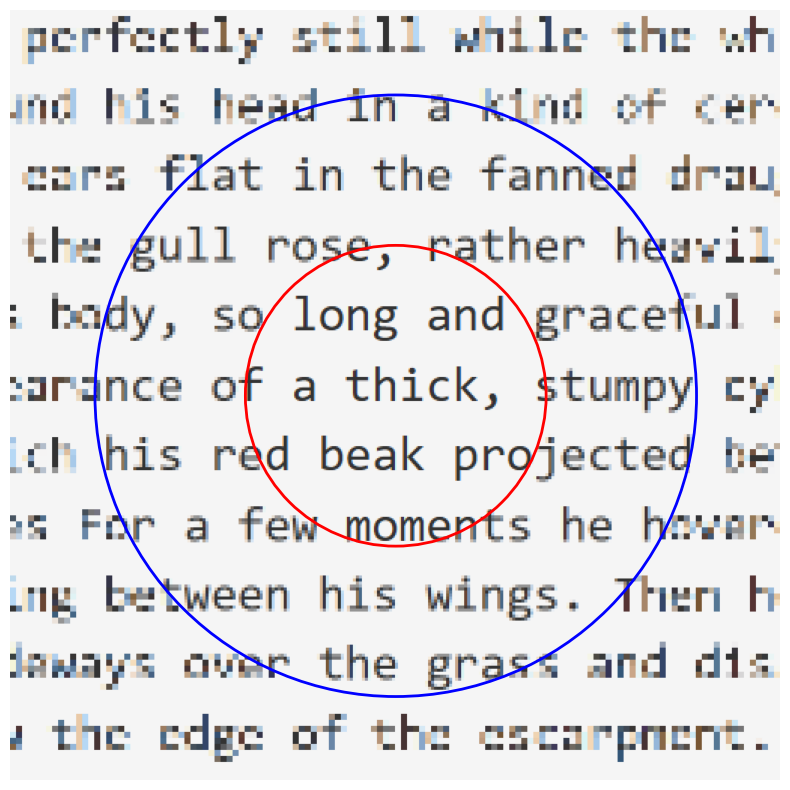

In [ ]:
center = (keehar_plaintext_rgb.shape[0] // 2, keehar_plaintext_rgb.shape[1] // 2)
radii = (100, 200)
foveated_keehar_plaintext_rgb = guenter_foveated_rendering_px(keehar_plaintext_rgb, center, radii)
visualize_guenter_foveated_regions_px(foveated_keehar_plaintext_rgb, center, radii)

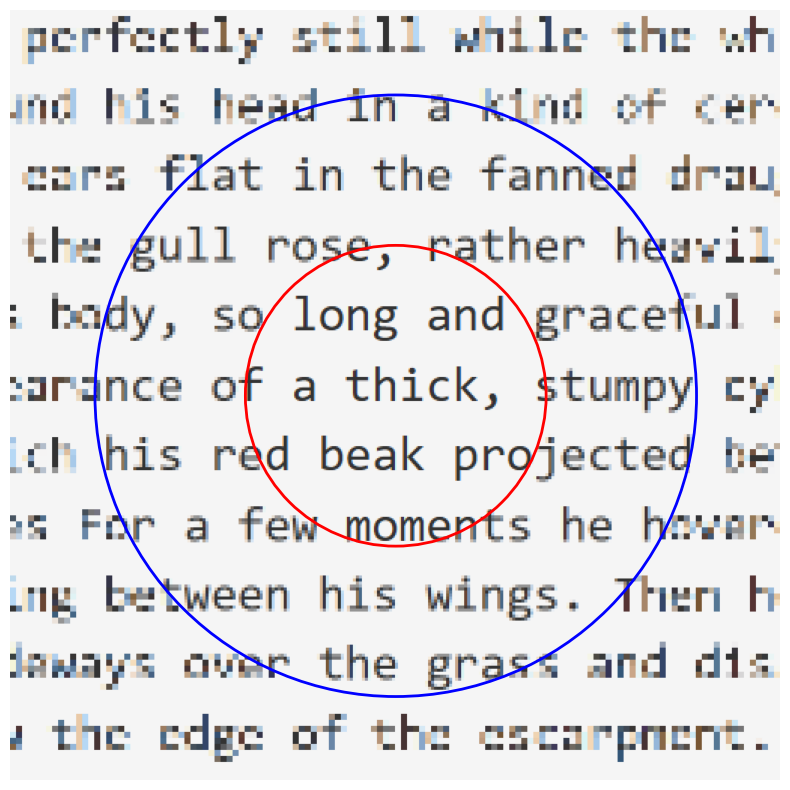

In [80]:
foveated_keehar_plaintext_rgb = guenter_foveated_rendering_px_mip(keehar_plaintext_rgb, center, radii)

visualize_guenter_foveated_regions_px(foveated_keehar_plaintext_rgb, center, radii)

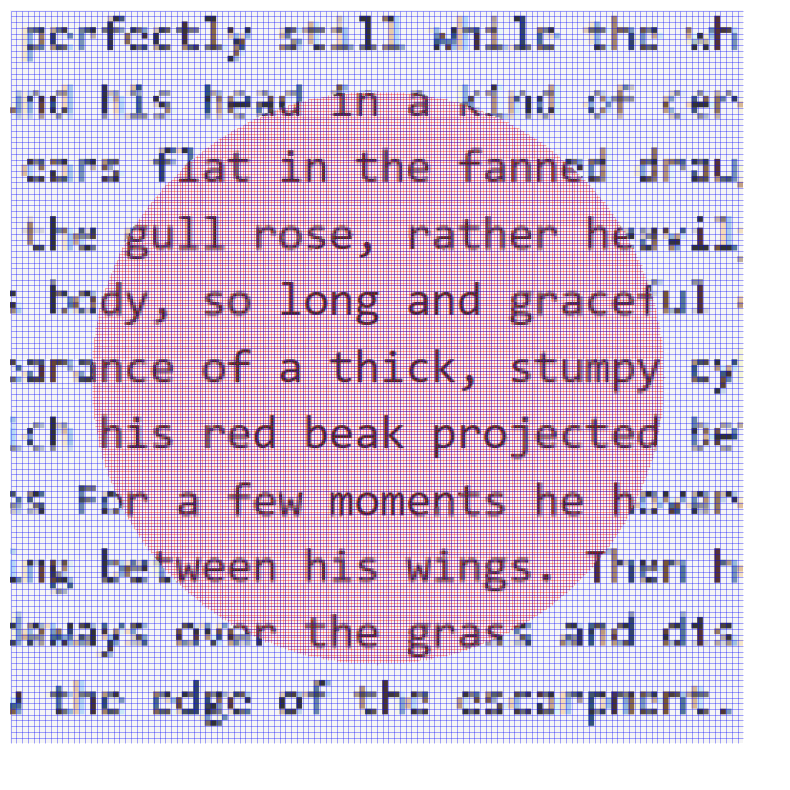

In [79]:
visualize_foveated_grid_px(foveated_keehar_plaintext_rgb, center, radii, (2, 4))

In [ ]:
%run src/foveation_utils.py
(mean_texture, variance_texture, skew_texture) = compute_base_moments(foveated_keehar_plaintext_rgb, center, 0.1, base_pooling_size = 8)